In [2]:
names = ["Amy", "Aaron", "Andrew", "Andrea", "Axel", "Amanda",
         "Brian", "Barbara", "Ben", "Belinda", "Bill", "Bert",
         "Carol", "Charlie", "Carl", "Cameron", "Cindy", "Cecelia",
         "David", "Deborah", "Dawn", "Dirk", "Denise", "Doug",
         "Eve", "Edward", "Elijah", "Elaine", "Evan", "Emily",
         "Fred", "Fiona", "Frank", "Florence", "Fabian", "Felicia",
         "George", "Grady", "Gail", "Gary", "Gabriel", "Gina",
         "Hector", "Henry", "Helen", "Hortense", "Howard", "Heather",
         "Ira", "Ida", "Irving", "Isaac", "Ivy", "Irwin",
         "Joe", "Jenny", "Jack", "Jill", "Jeremy", "Jason", "Jackie",
         "Karen", "Ken", "Kyle", "Kate", "Keith", "Krystal",
         "Larry", "Lisa", "Lyle", "Lori", "Leonard", "Lola",
         "Mary", "Martin", "Michelle", "Mickey", "Michael", "Melissa",
         "Nora", "Norman", "Neil", "Nancy", "Nena", "Neville",
         "Olga", "Orville", "Opal", "Oscar", "Ophelia",
         "Peter", "Priscilla", "Philip", "Phyllis", "Piper",
         "Quinn", "Querida", "Queenie", "Quincy",
         "Rob", "Ralph", "Rachael", "Rhoda", "Ronald",
         "Sandy", "Sam", "Sierra", "Steve", "Shelly", "Simon",
         "Ted", "Theresa", "Tom", "Tina", "Toby", "Toni",
         "Uma", "Uriel", "Uriah", "Ulysses", "Ursula",
         "Victor", "Vanessa", "Vickie", "Valerie", "Vance", "Vincent",
         "Wendy", "Wanda", "Will", "Warren", "Wilma", "Willard",
         "Xavier", "Xander", "Xena", "Xyla",
         "Yolanda", "Yves", "Yuri", "Yosef",
         "Zebediah", "Zack", "Zabelle", "Zane"]

In [9]:
import random

# The number of guests at the party, not including the host Alice
GUESTS = 10

# Bob is always invited
guest_list = ["Bob"]

# Build the random guest list
while len(guest_list) < GUESTS:
    invite = random.randrange(len(names))
    if names[invite] not in guest_list:
        guest_list.append(names[invite])

print(guest_list)

['Bob', 'Queenie', 'Wendy', 'Zebediah', 'Fred', 'Frank', 'Howard', 'Ben', 'Carol', 'Melissa']


In [10]:
# Bob always starts the rumor
spread = ["Bob"]
done = False
unique_recipients = 1

while not done:
    # Check to make sure that there are more guests to choose from, otherwise we're done
    if (len(spread) == len(guest_list)):
        done = True
    else:
        # pick someone to tell
        person = None
        while person == None:
            r = random.randrange(GUESTS)
            # It can't be the current recipient, or the previous one
            target = guest_list[r]
            if target != spread[len(spread) - 1] and (len(spread) < 2 or target != spread[len(spread) - 2]):
                person = target
        
        # We have a target, now decide if it's time to stop
        if person in spread:
            # This person already heard, so propagation stops
            done = True
        else:
            unique_recipients += 1
        spread.append(person)
            

print(spread)
print("Rumor propagated to " + str(unique_recipients) + " out of " + str(GUESTS) + " guests (" + str(unique_recipients/GUESTS*100) + "%).\n")



['Bob', 'Fred', 'Queenie', 'Ben', 'Carol', 'Frank', 'Melissa', 'Fred']
Rumor propagated to 7 out of 10 guests (70.0%).



<IPython.core.display.Javascript object>


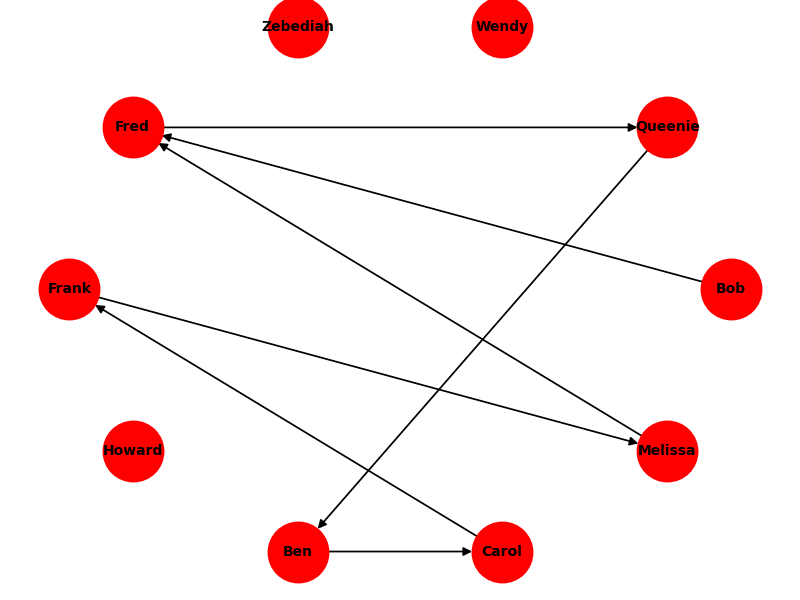

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(guest_list)

i = 0
while i < len(spread) - 1:
    G.add_edge(spread[i], spread[i+1])
    i += 1
    
#plt.subplot(121)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_size=8, font_weight='bold', node_size=1200, node_color="red")

plt.show()

